
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   1. Problem Statement

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

## <font color=Indigo>Business Problem Overview</font>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## <font color=Indigo>Business Objective</font>

The dataset contains customer-level information for a span of four consecutive months - June, July, August & September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## <font color=Indigo>Analysis Process</font>
The analysis is divided into nine main parts:
> 1. Data Sourcing or Data Understanding
2. Data cleaning and Derived Metrics
3. Exploratory Data Analysis (Univariate, Bivariate Analysis)
4. Model Preparation
     - Train and Test Data Split
     - Data Normalization
     - Handling Class Imbalance
5. Model Building
6. Residual Analysis of the Train Data
7. Making Predictions
8. Model Evaluation
9. Final Inference

In [1]:
# Ignore Warnings
import warnings 
warnings.filterwarnings(action ='ignore')

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_curve,precision_recall_curve,plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#    Read and understand the data

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [3]:
# Importing all datasets
telecom = pd.read_csv('telecom_churn_data.csv')

telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
### Check shape
telecom.shape

(99999, 226)

In [5]:
## Check info()
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
## Check describe()
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
data_dictory=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
data_dictory

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [8]:
#check for duplicates
telecom.duplicated().sum()

0

In [9]:
#copy of data set
telecom_df = telecom.copy()

In [10]:
#add to list
all_col = telecom.columns.tolist()

In [11]:
#recharge columns
rech_col = [i for i in all_col if 'rech' in i]
rech_col  

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

Above features shows High Value Customer

In [12]:
# Though we have total amount of recharge for talktime we dont have that number for data, instead we have average and number of rechanrges
# so let's calculate that amount
telecom_df['total_data_rech_amt_6'] = telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_data_rech_amt_7'] = telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']
telecom_df['total_data_rech_amt_8'] = telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']
telecom_df['total_data_rech_amt_9'] = telecom_df['av_rech_amt_data_9'] * telecom_df['total_rech_data_9']

In [13]:
# Drop the columns already accounted for 
telecom_df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [14]:
# Find Average recharge amount for good phase i.e 6th and 7th month
good_phase_average_rech_amt = ( telecom_df['total_rech_amt_6'].fillna(0) + telecom_df['total_rech_amt_7'].fillna(0) + 
                               telecom_df['total_data_rech_amt_6'].fillna(0) + telecom_df['total_data_rech_amt_7'].fillna(0) ) / 2

In [15]:
good_phase_average_rech_amt.shape

(99999,)

In [16]:
#find 70th percentile value
X= good_phase_average_rech_amt.quantile(0.7)
print(f'70 Percentile of recharge amount is : {X}')

70 Percentile of recharge amount is : 478.0


In [17]:
# Keep high value customer data
telecom_df = telecom_df[good_phase_average_rech_amt >= X]

In [18]:
#check shape
print(f'Shape of high value customer data: {telecom_df.shape}')

Shape of high value customer data: (30001, 222)


Shape of high value customer data: (30001, 222)

The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [19]:
# Seperating columns for the 9th month
mnth9_col= [i for i in all_col if '9' in i]

# Seperating the ic columns 
mnth9_ic_col = [i for i in mnth9_col if 'ic' in i and 'mou' in i]

# Seperating oc columns
mnth9_oc_col = [i for i in mnth9_col if 'oc' in i and 'mou' in i]

# Seperating vol columns
mnth9_vol_col = [i for i in mnth9_col if 'vol' in i and 'mb' in i]

In [20]:
# Sum of all the ic columns
telecom_df['ic_sum'] = telecom[mnth9_ic_col].sum(axis = 1)

# Sum of all the oc columns
telecom_df['oc_sum'] = telecom[mnth9_oc_col].sum(axis = 1)

# Sum of all the vol columns
telecom_df['vol_sum'] = telecom[mnth9_vol_col].sum(axis = 1)

In [21]:
telecom_tag_col = ['vol_sum', 'oc_sum', 'ic_sum']

# Create churn as the sum of newly aggregrated columns, as that will be 0 if all of the columns have 0 values
telecom_df['churn'] = telecom_df[telecom_tag_col].sum(axis = 1)

telecom_df.head(15)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   
57     7001682585        109             0.0             0.0             0.0   
61     7000152517        109             0.0             0.0             0.0   
67     7000800341        109             0.0             0.0             0.0   
69     7002393996        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
38            6/30/2014            7/31/2014            8/31/2014   
41            6/30/2014            7/31/2014            8/31/2014   
48            6/30/2014            7/31/2014            8/31/2014   
53            6/30/2014            7/31/2014            8/31/2014   
56            6/30/2014            7/31/2014            8/31/2014   
57            6/30/2014            7/31/2014            8/31/2014   
61            6/30/2014            7/31/2014            8/31/2014   
67            6/30/2014            7/31/2014            8/31/2014   
69            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803    21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480   500.000        57.84   
8             9/30/2014   378.721   492.223   137.362   166.787       413.69   
21            9/30/2014   514.453   597.753   637.760   578.596       102.41   
23            9/30/2014    74.350   193.897   366.966   811.480        48.96   
33            9/30/2014   977.020  2362.833   409.230   799.356         0.00   
38            9/30/2014   363.987   486.558   393.909   391.709       248.99   
41            9/30/2014   482.832   425.764   229.769   143.596        86.39   
48            9/30/2014  1873.271   575.927   179.218  1189.744      2061.69   
53            9/30/2014   978.077  1141.296   706.020  1076.247       135.14   
56            9/30/2014   452.624   320.548   368.807   281.710        34.46   
57            9/30/2014  1201.298   687.704   602.052  1529.608        61.23   
61            9/30/2014   565.516   390.307   430.911   368.777       178.41   
67                  NaN   218.818   386.515   386.502     0.000         0.00   
69            9/30/2014   809.518   794.775    33.060   179.852       181.63   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63    

In [22]:
#check shape
telecom_df.shape

(30001, 226)

In [23]:
# If the churn value is greater than 0 that means the user used a service indicating an active user
telecom_df['churn'] = telecom_df['churn'].apply(lambda x: 0 if x > 0 else 1)
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

In [24]:
#check count
telecom_df.churn.value_counts(normalize=True)*100

0    94.236859
1     5.763141
Name: churn, dtype: float64

In [25]:
# Dropping Month 9 Columns

#telecom_df.drop( [ i for i in mnth9_col + telecom_tag_col if i not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],  axis=1, inplace=True)
              
#telecom_df.shape

In [26]:
# List the date columns
unwated_cols = [ i for i in mnth9_col + telecom_tag_col if i not in ['total_rech_data_9', 'av_rech_amt_data_9']]


In [27]:
telecom_df=telecom_df.drop(unwated_cols,axis=1)
telecom_df.shape

(30001, 171)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   Data Cleaning and Preparation

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [28]:
telecom_df.isnull().sum().sort_values(ascending=False)

total_data_rech_amt_9       14781
arpu_3g_8                   14048
total_data_rech_amt_8       14048
fb_user_8                   14048
max_rech_data_8             14048
count_rech_2g_8             14048
count_rech_3g_8             14048
night_pck_user_8            14048
date_of_last_rech_data_8    14048
arpu_2g_8                   14048
arpu_3g_6                   13245
max_rech_data_6             13245
total_data_rech_amt_6       13245
night_pck_user_6            13245
fb_user_6                   13245
count_rech_3g_6             13245
date_of_last_rech_data_6    13245
count_rech_2g_6             13245
arpu_2g_6                   13245
date_of_last_rech_data_7    12944
total_data_rech_amt_7       12944
max_rech_data_7             12944
arpu_3g_7                   12944
count_rech_2g_7             12944
arpu_2g_7                   12944
count_rech_3g_7             12944
night_pck_user_7            12944
fb_user_7                   12944
loc_ic_t2t_mou_8             1174
og_others_8   

In [29]:
#Check for null values %
print("Checking Missing Values in %")
print("-"*100)
round(100*telecom_df.isnull().mean().sort_values(ascending=False),2)

Checking Missing Values in %
----------------------------------------------------------------------------------------------------


total_data_rech_amt_9       49.27
arpu_3g_8                   46.83
total_data_rech_amt_8       46.83
fb_user_8                   46.83
max_rech_data_8             46.83
count_rech_2g_8             46.83
count_rech_3g_8             46.83
night_pck_user_8            46.83
date_of_last_rech_data_8    46.83
arpu_2g_8                   46.83
arpu_3g_6                   44.15
max_rech_data_6             44.15
total_data_rech_amt_6       44.15
night_pck_user_6            44.15
fb_user_6                   44.15
count_rech_3g_6             44.15
date_of_last_rech_data_6    44.15
count_rech_2g_6             44.15
arpu_2g_6                   44.15
date_of_last_rech_data_7    43.15
total_data_rech_amt_7       43.15
max_rech_data_7             43.15
arpu_3g_7                   43.15
count_rech_2g_7             43.15
arpu_2g_7                   43.15
count_rech_3g_7             43.15
night_pck_user_7            43.15
fb_user_7                   43.15
loc_ic_t2t_mou_8             3.91
og_others_8   

In [30]:
#Drop all the features  with more than 45% missing values
cols=telecom_df.columns

for i in cols:
    if((100*(telecom_df[i].isnull().sum()/len(telecom_df.index))) >= 30):
        telecom_df.drop(i, 1, inplace = True)

In [31]:
telecom_df.shape

(30001, 143)

In [32]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 143 entries, mobile_number to churn
dtypes: float64(109), int64(28), object(6)
memory usage: 33.0+ MB


In [33]:
#Check for null values %
print("Checking Missing Values in %")
print("-"*100)
round(100*telecom_df.isnull().mean().sort_values(ascending=False),2)

Checking Missing Values in %
----------------------------------------------------------------------------------------------------


loc_ic_mou_8            3.91
og_others_8             3.91
loc_og_t2f_mou_8        3.91
loc_ic_t2t_mou_8        3.91
spl_og_mou_8            3.91
loc_og_t2m_mou_8        3.91
loc_ic_t2m_mou_8        3.91
loc_ic_t2f_mou_8        3.91
loc_og_t2t_mou_8        3.91
std_og_t2f_mou_8        3.91
roam_og_mou_8           3.91
loc_og_mou_8            3.91
std_ic_t2t_mou_8        3.91
roam_ic_mou_8           3.91
isd_og_mou_8            3.91
std_ic_t2m_mou_8        3.91
offnet_mou_8            3.91
std_ic_t2f_mou_8        3.91
onnet_mou_8             3.91
std_og_t2t_mou_8        3.91
std_ic_t2o_mou_8        3.91
std_og_mou_8            3.91
std_ic_mou_8            3.91
spl_ic_mou_8            3.91
std_og_t2m_mou_8        3.91
isd_ic_mou_8            3.91
std_og_t2c_mou_8        3.91
ic_others_8             3.91
loc_og_t2c_mou_8        3.91
date_of_last_rech_8     1.94
isd_og_mou_6            1.82
spl_og_mou_6            1.82
std_og_mou_6            1.82
loc_ic_t2f_mou_6        1.82
loc_ic_t2t_mou

In [34]:
#segregate contiues columns
num_vars = telecom_df.select_dtypes(include=['float64', 'int64']).columns
print(len(num_vars))

137


In [35]:
#segregate object columns
cat_vars = telecom_df.select_dtypes(include='object').columns
print(len(cat_vars))

6


In [36]:
for i in num_vars:
    if telecom_df[i].isnull().sum()>0:
        val=telecom_df[i].median()
        telecom_df[i]=telecom_df[i].fillna(val)

In [37]:
for i in cat_vars:
    if telecom_df[i].isnull().sum()>0:
        val=telecom_df[i].mode()[0]
        telecom_df[i]=telecom_df[i].fillna(val)

In [38]:
# Check the number of null values again

telecom_df.isnull().sum().sort_values(ascending=False)

mobile_number           0
isd_ic_mou_6            0
total_ic_mou_6          0
total_ic_mou_7          0
total_ic_mou_8          0
spl_ic_mou_6            0
spl_ic_mou_7            0
spl_ic_mou_8            0
isd_ic_mou_7            0
std_ic_mou_7            0
isd_ic_mou_8            0
ic_others_6             0
ic_others_7             0
ic_others_8             0
total_rech_num_6        0
total_rech_num_7        0
std_ic_mou_8            0
std_ic_mou_6            0
total_rech_amt_6        0
std_ic_t2m_mou_6        0
loc_ic_mou_6            0
loc_ic_mou_7            0
loc_ic_mou_8            0
std_ic_t2t_mou_6        0
std_ic_t2t_mou_7        0
std_ic_t2t_mou_8        0
std_ic_t2m_mou_7        0
std_ic_t2o_mou_8        0
std_ic_t2m_mou_8        0
std_ic_t2f_mou_6        0
std_ic_t2f_mou_7        0
std_ic_t2f_mou_8        0
std_ic_t2o_mou_6        0
std_ic_t2o_mou_7        0
total_rech_num_8        0
total_rech_amt_7        0
loc_ic_t2f_mou_7        0
sachet_3g_6             0
sachet_2g_6 

In [39]:
print(len(telecom_df.index))
print(len(telecom_df.index)/99999)

30001
0.3000130001300013


In [40]:
# List the date columns
date_cols = [i for i in telecom_df.columns.to_list() if 'date' in i]
print(len(date_cols))

6


In [41]:
telecom_df=telecom_df.drop(date_cols,axis=1)

In [42]:
telecom_df.shape

(30001, 137)

In [43]:
#check each data in cols.
for i in telecom_df.columns:
    print(telecom_df[i].astype('category').value_counts())
    print("----------------------------------------------------")

7000000074    1
7001601390    1
7001602045    1
7001601899    1
7001601864    1
             ..
7000810387    1
7000810312    1
7000810254    1
7000810224    1
7002410905    1
Name: mobile_number, Length: 30001, dtype: int64
----------------------------------------------------
109    30001
Name: circle_id, dtype: int64
----------------------------------------------------
0.0    30001
Name: loc_og_t2o_mou, dtype: int64
----------------------------------------------------
0.0    30001
Name: std_og_t2o_mou, dtype: int64
----------------------------------------------------
0.0    30001
Name: loc_ic_t2o_mou, dtype: int64
----------------------------------------------------
0.0          227
213.821       18
213.822       17
213.818       16
213.815       14
            ... 
381.706        1
381.694        1
381.69         1
381.689        1
27731.088      1
Name: arpu_6, Length: 29072, dtype: int64
----------------------------------------------------
0.0          223
213.795       19
213.808

In [44]:
#check for continues or categorical
unique_val=[]
for col in telecom_df.columns:
    if len(telecom_df[col].unique()) == 1:
        unique_val.append([col])
        
        
unique_val        

[['circle_id'],
 ['loc_og_t2o_mou'],
 ['std_og_t2o_mou'],
 ['loc_ic_t2o_mou'],
 ['std_og_t2c_mou_6'],
 ['std_og_t2c_mou_7'],
 ['std_og_t2c_mou_8'],
 ['std_ic_t2o_mou_6'],
 ['std_ic_t2o_mou_7'],
 ['std_ic_t2o_mou_8']]

In [45]:
unique_val=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [46]:
# Dropping date columns
telecom_df = telecom_df.drop(unique_val, axis=1)
telecom_df.shape

(30001, 127)

In [47]:
# Dropping date columns
telecom_df = telecom_df.drop(['mobile_number'], axis=1)
telecom_df.shape

(30001, 126)

In [48]:
telecom_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803        88.06       86.885         0.00   
7   1069.180  1349.850  3171.480        57.84       54.680        52.29   
8    378.721   492.223   137.362       413.69      351.030        35.08   
21   514.453   597.753   637.760       102.41      132.110        85.14   
23    74.350   193.897   366.966        48.96       50.660        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        229.635        227.12          0.00           0.00           0.00   
7        453.430        567.16        325.91          16.23          33.49   
8         94.660         80.63        136.48           0.00           0.00   
21       757.930        896.68        983.39           0.00           0.00   
23        85.410         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              25.58             25.78              0.00             80.24   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             81.685              0.00              0.11              0.21   
7            447.380            162.28             62.13             55.14   
8             70.580             50.54              0.00              0.00   
21            87.930            104.81              0.75              0.00   
23            83.010            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         129.35        132.73          0.00              3.36   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               3.30              0.00            18.185             17.75   
7              23.29             12.01            49.890             31.76   
8             133.43             22.58            13.690             10.04   
21            125.94             61.79           665.360            808.74   
23              0.00              0.00             2.360              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [49]:
telecom_df.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.671732  0.612617     0.340683     0.216320   
arpu_7              0.671732  1.000000  0.759858     0.211257     0.319038   
arpu_8              0.612617  0.759858  1.000000     0.150984     0.232184   
onnet_mou_6         0.340683  0.211257  0.150984     1.000000     0.750918   
onnet_mou_7         0.216320  0.319038  0.232184     0.750918     1.000000   
onnet_mou_8         0.187882  0.268170  0.343370     0.621607     0.806003   
offnet_mou_6        0.505896  0.351623  0.278029     0.085188     0.051423   
offnet_mou_7        0.340472  0.486602  0.374073     0.035446     0.080080   
offnet_mou_8        0.288877  0.391372  0.515364     0.035093     0.071411   
roam_ic_mou_6       0.126884  0.092501  0.087996     0.023822     0.037853   
roam_ic_mou_7       0.083484  0.093692  0.077709     0.024303     0.007893   
roam_ic_mou_8       0.090363  0.093961  0.110842     0.043731     0.036830   
roam_og_mou_6       0.196086  0.133520  0.128323     0.076626     0.081011   
roam_og_mou_7       0.143261  0.179894  0.141421     0.075274     0.068031   
roam_og_mou_8       0.124994  0.152217  0.199114     0.072610     0.083459   
loc_og_t2t_mou_6    0.166106  0.106334  0.100801     0.455958     0.344868   
loc_og_t2t_mou_7    0.127672  0.156676  0.132121     0.355499     0.463102   
loc_og_t2t_mou_8    0.124242  0.133652  0.175655     0.312005     0.380042   
loc_og_t2m_mou_6    0.329279  0.214907  0.211102     0.026437    -0.008539   
loc_og_t2m_mou_7    0.245579  0.299894  0.264108    -0.002756     0.010565   
loc_og_t2m_mou_8    0.220657  0.251796  0.344326    -0.007858     0.000107   
loc_og_t2f_mou_6    0.139377  0.112050  0.120792    -0.030942    -0.037764   
loc_og_t2f_mou_7    0.114366  0.140855  0.135150    -0.038988    -0.034478   
loc_og_t2f_mou_8    0.104302  0.121890  0.160204    -0.039852    -0.035381   
loc_og_t2c_mou_6    0.047680  0.009198  0.002303     0.053518     0.036182   
loc_og_t2c_mou_7    0.010017  0.040485  0.021742     0.031019     0.048290   
loc_og_t2c_mou_8    0.011393  0.032706  0.057143     0.041762     0.059209   
loc_og_mou_6        0.325865  0.212920  0.207484     0.291662     0.200935   
loc_og_mou_7        0.246713  0.301070  0.262068     0.223942     0.301807   
loc_og_mou_8        0.225929  0.251438  0.338483     0.188939     0.236472   
std_og_t2t_mou_6    0.274009  0.166600  0.102683     0.859392     0.640475   
std_og_t2t_mou_7    0.161531  0.260692  0.178656     0.637642     0.860299   
std_og_t2t_mou_8    0.133814  0.219857  0.279581     0.522209     0.694179   
std_og_t2m_mou_6    0.301138  0.203644  0.120940     0.084400     0.064187   
std_og_t2m_mou_7    0.181436  0.307367  0.207126     0.043518     0.087084   
std_og_t2m_mou_8    0.139948  0.238626  0.324014     0.043227     0.082011   
std_og_t2f_mou_6    0.066751  0.051743  0.055607    -0.021734    -0.025176   
std_og_t2f_mou_7    0.053564  0.070678  0.068161    -0.024082    -0.019240   
std_og_t2f_mou_8    0.043895  0.053822  0.071213    -0.025957    -0.023654   
std_og_mou_6        0.385151  0.248390  0.150357     0.626628     0.467724   
std_og_mou_7        0.230488  0.381018  0.259047     0.448833     0.625088   
std_og_mou_8        0.182412  0.304468  0.400736     0.369782     0.507963   
isd_og_mou_6        0.466898  0.416974  0.394451    -0.014949    -0.014090   
isd_og_mou_7        0.420753  0.508862  0.437707    -0.015973    -0.014174   
isd_og_mou_8        0.413504  0.452315  0.454962    -0.013945    -0.012195   
spl_og_mou_6        0.122543  0.067211  0.099859     0.097828     0.061100   
spl_og_mou_7        0.068475  0.114535  0.124687     0.078339     0.109311   
spl_og_mou_8        0.044715  0.069720  0.107294     0.082903     0.109017   
og_others_6         0.054782  0.017885  0.013085     0.054173     0.028186   
og_others_7         0.024347  0.026086  0.015755    -0.000557    -0.000469   
og_others_8         0.015490  0.017858  0.01

In [50]:
#Checking correlations of numeric values using heatmap

# Size of the figure
#plt.figure(figsize=(24,18))
#sns.heatmap(telecom_df.corr(),annot=True,cmap="YlGnBu")
#plt.show()

In [51]:
corr_matrix = telecom_df.corr().abs() 
 
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1) 
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))) 
 
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)] 
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features) 
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


Total features with high correlation -  33


In [52]:
#find the co-relation 
corr_matrix = telecom_df.corr()
corr_matrix.loc[:, :] = np.tril(corr_matrix, -1)
corr_matrix = corr_matrix.stack()
high_corr_value = corr_matrix[(corr_matrix > 0.60) | (corr_matrix < -0.60)]
high_corr_value

arpu_7              arpu_6              0.671732
arpu_8              arpu_6              0.612617
                    arpu_7              0.759858
onnet_mou_7         onnet_mou_6         0.750918
onnet_mou_8         onnet_mou_6         0.621607
                    onnet_mou_7         0.806003
offnet_mou_7        offnet_mou_6        0.739237
offnet_mou_8        offnet_mou_7        0.766835
roam_ic_mou_8       roam_ic_mou_7       0.606110
roam_og_mou_6       roam_ic_mou_6       0.645915
roam_og_mou_8       roam_og_mou_7       0.601079
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.794291
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.700442
                    loc_og_t2t_mou_7    0.832959
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.783734
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.685729
                    loc_og_t2m_mou_7    0.822952
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.809065
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.671204
                    loc_og_t2f_mou_7    0.777089
loc_og_mou_6        

In [53]:
# List of columns that are explained well by other columns
col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
telecom_df.drop(col_corr, axis=1, inplace=True)
telecom_df.shape

(30001, 87)

### Driving new features

In [54]:
# Create a sum of mou instead of offnet and onnet

telecom_df['total_mou_6'] = telecom_df['onnet_mou_6'] + telecom_df['offnet_mou_6']
telecom_df['total_mou_7'] = telecom_df['onnet_mou_7'] + telecom_df['offnet_mou_7']
telecom_df['total_mou_8'] = telecom_df['onnet_mou_8'] + telecom_df['offnet_mou_8']

# Drop the redundant columns
telecom_df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

telecom_df.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0    197.385   214.816   213.803           0.00           0.00           0.00   
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
21   514.453   597.753   637.760           0.00           0.00           0.00   
23    74.350   193.897   366.966           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  \
0            0.00           0.00           0.00               0.0   
7           23.74          12.59          38.06               0.0   
8            0.00           0.00           0.00               0.0   
21           0.00           0.00           0.00               0.0   
23           0.00           0.00           0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0                0.0              0.00        129.35        132.73   
7                0.0              0.00        422.16        533.91   
8                0.0              7.15        378.09        288.18   
21               0.0              0.00         97.04         94.09   
23               0.0             17.71        131.91        133.68   

    loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79              6.66             20.08             16.68   
8          63.04              0.00              0.00              0.00   
21        129.74              0.00              0.00              0.00   
23        182.14              0.00              0.00              0.00   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0         50.795        50.035          0.00           0.0          0.00   
7         60.860        75.140         77.84           0.0          0.18   
8        130.260       143.480         98.28           0.0          0.00   
21       763.290       934.690        938.79           0.0          0.00   
23         2.360         6.350         39.61           0.0          0.01   

    isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.00          0.31          0.81          0.00          0.0   
7          10.01          4.50          0.00          6.50          0.0   
8           0.00          0.00          0.00         10.23          0.0   
21          0.00          0.00          0.00          0.00          0.0   
23          0.00          0.10          0.00         17.71          0.0   

    og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0           0.0          0.0        138.63        141.79          5.44   
7           0.0          0.0        427.88        355.23        188.04   
8           0.0          0.0         81.43         23.83         15.79   
21          0.0          0.0        125.33         87.68        159.11   
23          0.0          0.0        116.63        174.41        224.21   

    std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2f_mou_6  \
0               0.48              0.55              0.00              0.00   
7              36.89             11.83             30.39             52.19   
8               0.00              0.58              0.10              0.00   
21             14.06              5.98              0.18              0.00   
23              0.51              0.00             13.38              0.00   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  \
0               0.00              0.00         11.98         12.74   
7              34.24             22.21        180.54        173.08   
8               0.00              0.00         22.43          4.66   
21              0.00              0.00         81.76         44.21   
23              0.00              0.00          2.94         14.89

In [55]:
telecom_df.shape

(30001, 84)

In [56]:
# Seperate columns for 6th and 7th month
col_6_7 = [col[:-2] for col in telecom_df.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_6_7):
    telecom_df[f'gd_ph_{col}'] = ( telecom_df[f'{col}_6'] + telecom_df[f'{col}_7'] ) / 2
    telecom_df.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
telecom_df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    213.803           0.00           0.00              0.00          0.00   
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.00          0.0   
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0           5.44              0.00              0.00          0.00   
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
21        159.11              0.18              0.00        101.93   
23        224.21             13.38              0.00         57.29   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0            0.0          0.00         0.00                 2             252   
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0                  252         5.75             0            0             1   
7                  779         0.00             0            0             0   
8                   10         0.03             0            3             0   
21                  50         0.00             0            0             0   
23                   0         0.01             0            0             1   

    sachet_3g_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
0             0  968       30.40        0.00      101.20        3.58      1   
7             0  802       57.74       19.38       18.74        0.00      1   
8             0  315       21.03      910.65      122.16        0.00      0   
21            0  720        0.00        0.00        0.00        0.00      0   
23            1  604       40.45       51.86        0.00        0.00      0   

    total_mou_8  gd_ph_og_others  gd_ph_isd_og_mou  gd_ph_std_og_mou  \
0          0.00              0.0             0.000            50.415   
7        378.20              0.0             0.090            68.000   
8        171.56              0.0             0.000           136.870   
21      1068.53              0.0             0.000           848.990   
23       239.47              0.0             0.005             4.355   

    gd_ph_total_mou  gd_ph_loc_og_t2c_mou  gd_ph_ic_others  \
0           315.850                   0.0            0.000   
7           566.555                   0.0           15.465   
8           470.005                   0.0            0.000   
21          944.565                   0.0            0.000   
23          137.195                   0.0            2.675   

    gd_ph_last_day_rch_amt  gd_ph_arpu  gd_ph_total_rech_num  gd_ph_sachet_3g  \
0                    252.0    206.1005                   3.5              0.0   
7                      0.0   1209.5150                   5.0              0.0   
8                     25.0    435.4720                  20.0              0.0   
21                    25.0    556.1030                  24.0        

In [57]:
telecom_df.shape

(30001, 58)

In [58]:
# Create new column
telecom_df['gd_ph_vbc_3g'] = ( telecom_df['jul_vbc_3g'] + telecom_df['jun_vbc_3g'] ) / 2

# Drop redundant column
telecom_df.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)



In [59]:
# Rename the august column for vbc to vbc_3g_8
telecom_df['vbc_3g_8'] = telecom_df['aug_vbc_3g']
telecom_df.drop('aug_vbc_3g', axis=1, inplace=True)

telecom_df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    213.803           0.00           0.00              0.00          0.00   
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.00          0.0   
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0           5.44              0.00              0.00          0.00   
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
21        159.11              0.18              0.00        101.93   
23        224.21             13.38              0.00         57.29   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0            0.0          0.00         0.00                 2             252   
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0                  252         5.75             0            0             1   
7                  779         0.00             0            0             0   
8                   10         0.03             0            3             0   
21                  50         0.00             0            0             0   
23                   0         0.01             0            0             1   

    sachet_3g_8  aon  churn  total_mou_8  gd_ph_og_others  gd_ph_isd_og_mou  \
0             0  968      1         0.00              0.0             0.000   
7             0  802      1       378.20              0.0             0.090   
8             0  315      0       171.56              0.0             0.000   
21            0  720      0      1068.53              0.0             0.000   
23            1  604      0       239.47              0.0             0.005   

    gd_ph_std_og_mou  gd_ph_total_mou  gd_ph_loc_og_t2c_mou  gd_ph_ic_others  \
0             50.415          315.850                   0.0            0.000   
7             68.000          566.555                   0.0           15.465   
8            136.870          470.005                   0.0            0.000   
21           848.990          944.565                   0.0            0.000   
23             4.355          137.195                   0.0            2.675   

    gd_ph_last_day_rch_amt  gd_ph_arpu  gd_ph_total_rech_num  gd_ph_sachet_3g  \
0                    252.0    206.1005                   3.5              0.0   
7                      0.0   1209.5150                   5.0              0.0   
8                     25.0    435.4720                  20.0              0.0   
21                    25.0    556.1030                  24.0              0.0   
23                    89.5    134.1235                   4.0              0.0   

    gd_ph_loc_ic_mou  gd_ph_spl_og_mou  gd_ph_roam_ic_mou  gd_ph_monthly_2g  \
0            140.210              0.56               0.00               0.0   
7            391.555              2.25              24.86               

In [60]:
telecom_df.shape

(30001, 56)

In [61]:
# Reset the index 
telecom_df.reset_index(inplace=True, drop=True)
telecom_df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   213.803           0.00           0.00              0.00          0.00   
1  3171.480          31.64          38.06              0.00        255.79   
2   137.362           0.00           0.00              7.15         63.04   
3   637.760           0.00           0.00              0.00        129.74   
4   366.966           0.00           0.00             17.71        182.14   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0              0.00          0.00          0.00          0.00          0.0   
1             16.68         77.84         10.01          6.50          0.0   
2              0.00         98.28          0.00         10.23          0.0   
3              0.00        938.79          0.00          0.00          0.0   
4              0.00         39.61          0.00         17.71          0.0   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0          5.44              0.00              0.00          0.00   
1        188.04             30.39             22.21        193.94   
2         15.79              0.10              0.00          0.75   
3        159.11              0.18              0.00        101.93   
4        224.21             13.38              0.00         57.29   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0          0.00         0.00                 2             252   
1           0.0         31.59        15.14                 7            1580   
2           0.0          0.00         0.00                14              30   
3           0.0          0.00         0.00                27              50   
4           0.0          3.74        13.06                 4             179   

   last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0                 252         5.75             0            0             1   
1                 779         0.00             0            0             0   
2                  10         0.03             0            3             0   
3                  50         0.00             0            0             0   
4                   0         0.01             0            0             1   

   sachet_3g_8  aon  churn  total_mou_8  gd_ph_og_others  gd_ph_isd_og_mou  \
0            0  968      1         0.00              0.0             0.000   
1            0  802      1       378.20              0.0             0.090   
2            0  315      0       171.56              0.0             0.000   
3            0  720      0      1068.53              0.0             0.000   
4            1  604      0       239.47              0.0             0.005   

   gd_ph_std_og_mou  gd_ph_total_mou  gd_ph_loc_og_t2c_mou  gd_ph_ic_others  \
0            50.415          315.850                   0.0            0.000   
1            68.000          566.555                   0.0           15.465   
2           136.870          470.005                   0.0            0.000   
3           848.990          944.565                   0.0            0.000   
4             4.355          137.195                   0.0            2.675   

   gd_ph_last_day_rch_amt  gd_ph_arpu  gd_ph_total_rech_num  gd_ph_sachet_3g  \
0                   252.0    206.1005                   3.5              0.0   
1                     0.0   1209.5150                   5.0              0.0   
2                    25.0    435.4720                  20.0              0.0   
3                    25.0    556.1030                  24.0              0.0   
4                    89.5    134.1235                   4.0              0.0   

   gd_ph_loc_ic_mou  gd_ph_spl_og_mou  gd_ph_roam_ic_mou  gd_ph_monthly_2g  \
0           140.210              0.56               0.00               0.0   
1           391.555              2.25              24.86               0.0   
2            52.630              0.00      

In [62]:
telecom_df.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  30001.000000   30001.000000   30001.000000      30001.000000   
mean     508.597957      12.500551      19.865615          1.707746   
std      501.961981      74.125281     104.719009          7.208138   
min     -945.808000       0.000000       0.000000          0.000000   
25%      231.473000       0.000000       0.000000          0.000000   
50%      427.585000       0.000000       0.000000          0.000000   
75%      661.491000       0.000000       0.000000          0.010000   
max    33543.624000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  30001.000000      30001.000000  30001.000000  30001.000000   
mean     240.457671          1.584734    308.658150      1.948970   
std      361.050292         10.931804    608.363658     44.712024   
min        0.000000          0.000000      0.000000      0.000000   
25%       31.960000          0.000000      0.050000      0.000000   
50%      120.860000          0.000000     32.680000      0.000000   
75%      310.610000          0.000000    357.230000      0.000000   
max    11039.910000        516.910000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
count  30001.000000  30001.000000  30001.000000      30001.000000   
mean       6.583031      0.057607    228.648855         13.924662   
std       20.303921      3.315125    305.558185         71.336406   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000     51.780000          0.000000   
50%        0.660000      0.000000    137.590000          0.280000   
75%        6.150000      0.000000    285.440000          7.040000   
max      954.510000    394.930000   5388.740000       4309.290000   

       std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
count      30001.000000  30001.000000  30001.000000  30001.000000   
mean           2.561970     44.814105      0.026567     10.998257   
std           19.896938    138.696369      0.110697     70.600636   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      1.030000      0.000000      0.000000   
50%            0.000000     10.540000      0.000000      0.000000   
75%            0.080000     38.380000      0.000000      0.000000   
max         1394.890000   5957.140000      6.230000   3432.880000   

        ic_others_8  total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  \
count  30001.000000      30001.000000    30001.000000        30001.000000   
mean       1.224455          9.972868      160.144462           92.393654   
std       12.783238          9.274370      173.207799          145.182324   
min        0.000000          0.000000        0.000000            0.000000   
25%        0.000000          4.000000       50.000000            0.000000   
50%        0.000000          8.000000      130.000000           50.000000   
75%        0.000000         13.000000      198.000000          130.000000   
max     1209.860000        196.000000     4449.000000         4449.000000   

        vol_2g_mb_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     105.913072      0.153628      1.054865      0.211026      0.202393   
std      313.384838      0.406486      2.535940      0.617549      1.100107   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       51.650000      0.000000      1.000000      0.000000      0.000000   
max    11117.610000      5.000000     44.000000     16.000000     41.000000   

                aon         churn   total_mou_8  gd_ph_og_others  \
count  30001.000000  30001.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


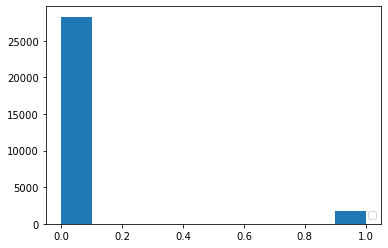

In [63]:
# Distribution of target variable

plt.hist(telecom_df['churn'])
plt.legend(loc="lower right")
plt.show()

In [64]:
#segregate contiues columns
num_vars = telecom_df.select_dtypes(include=['float64', 'int64']).columns
print(len(num_vars))

56


In [65]:
list(telecom_df.columns)

['arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'churn',
 'total_mou_8',
 'gd_ph_og_others',
 'gd_ph_isd_og_mou',
 'gd_ph_std_og_mou',
 'gd_ph_total_mou',
 'gd_ph_loc_og_t2c_mou',
 'gd_ph_ic_others',
 'gd_ph_last_day_rch_amt',
 'gd_ph_arpu',
 'gd_ph_total_rech_num',
 'gd_ph_sachet_3g',
 'gd_ph_loc_ic_mou',
 'gd_ph_spl_og_mou',
 'gd_ph_roam_ic_mou',
 'gd_ph_monthly_2g',
 'gd_ph_vol_2g_mb',
 'gd_ph_isd_ic_mou',
 'gd_ph_monthly_3g',
 'gd_ph_spl_ic_mou',
 'gd_ph_std_ic_t2f_mou',
 'gd_ph_roam_og_mou',
 'gd_ph_loc_og_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_sachet_2g',
 'gd_p

In [66]:
out_cols = ['arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'churn',
 'total_mou_8',
 'gd_ph_std_ic_t2f_mou',
 'gd_ph_loc_ic_mou',
 'gd_ph_spl_og_mou',
 'gd_ph_total_rech_num',
 'gd_ph_isd_ic_mou',
 'gd_ph_total_mou',
 'gd_ph_loc_og_t2c_mou',
 'gd_ph_roam_ic_mou',
 'gd_ph_spl_ic_mou',
 'gd_ph_monthly_3g',
 'gd_ph_monthly_2g',
 'gd_ph_std_ic_t2t_mou',
 'gd_ph_og_others',
 'gd_ph_ic_others',
 'gd_ph_vol_2g_mb',
 'gd_ph_std_og_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_sachet_2g',
 'gd_ph_sachet_3g',
 'gd_ph_arpu',
 'gd_ph_last_day_rch_amt',
 'gd_ph_loc_og_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_max_rech_amt',
 'gd_ph_roam_og_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_vbc_3g',
 'vbc_3g_8']
print(len(out_cols))

56


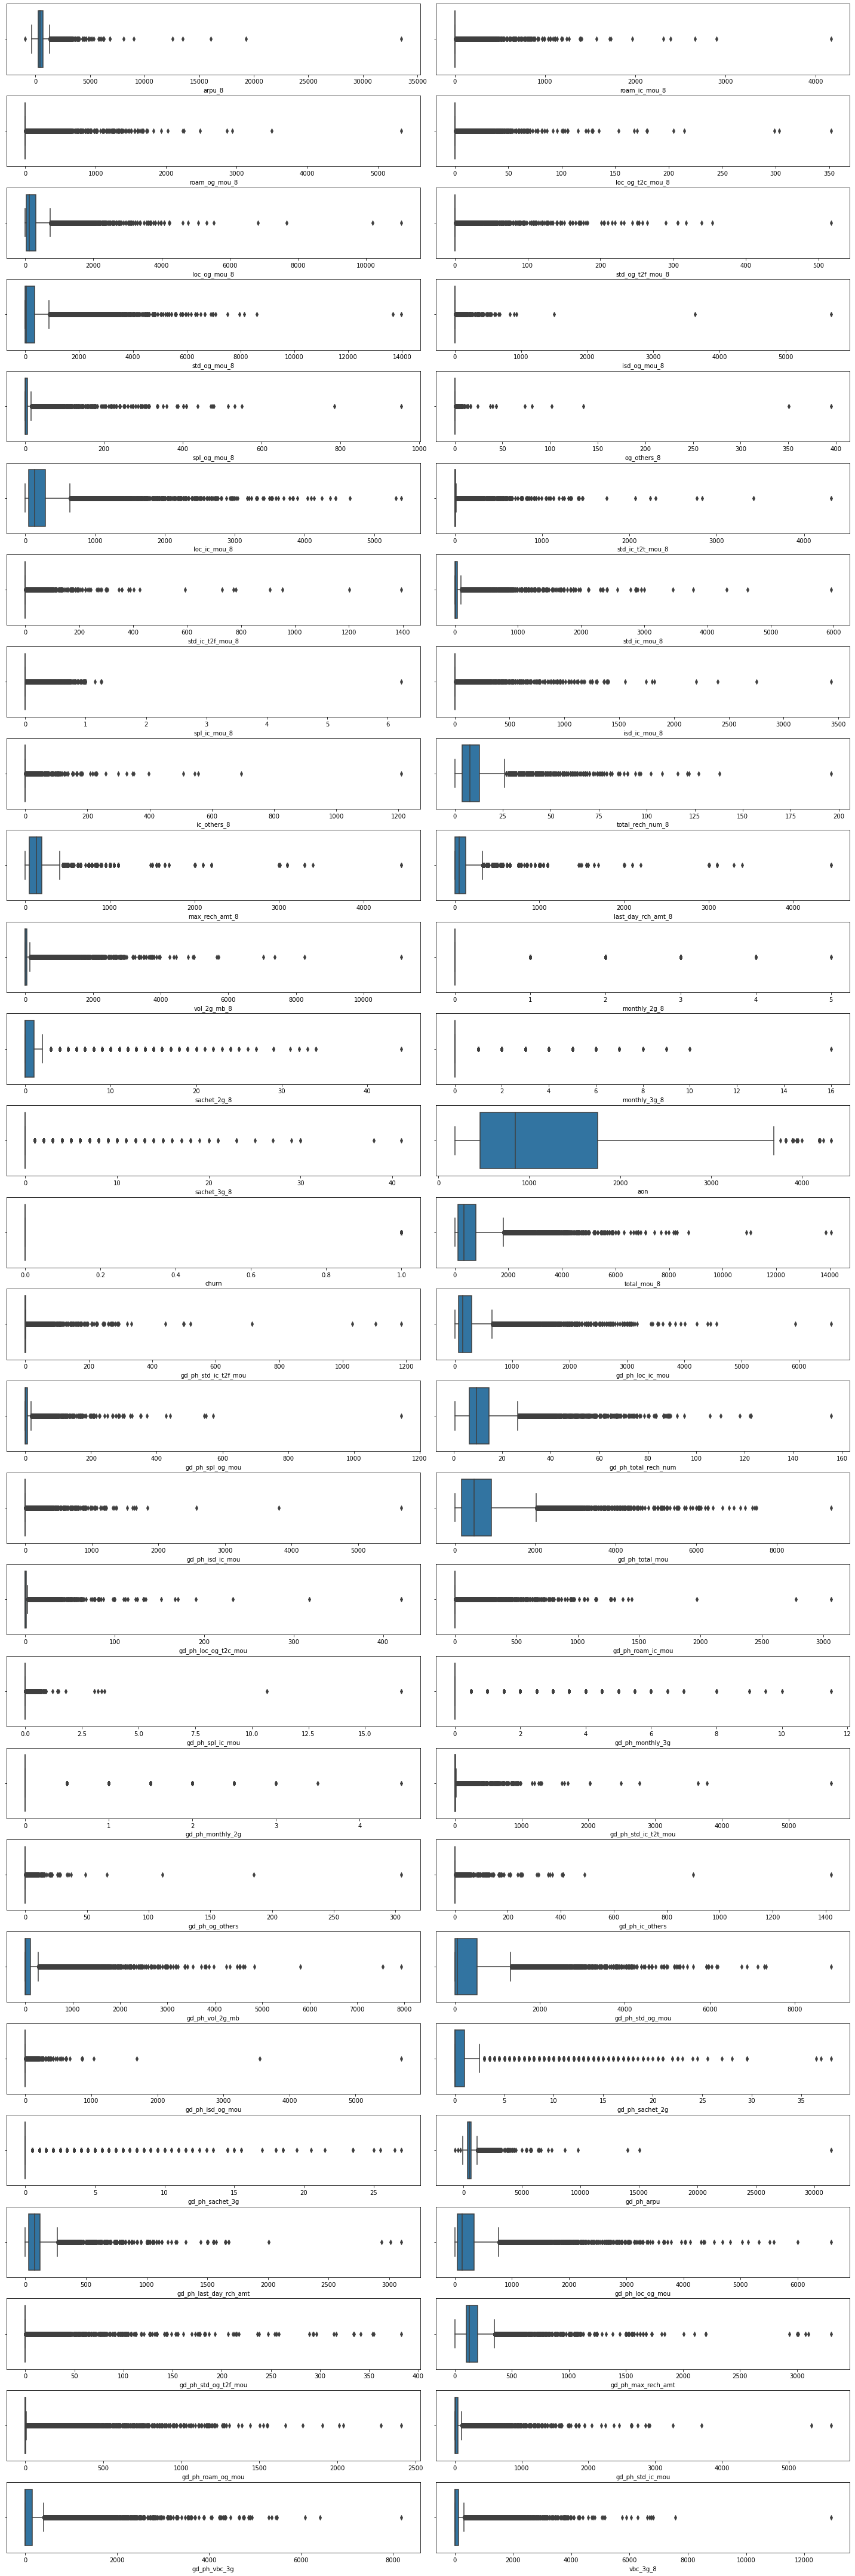

In [67]:

# Verifying if outliers have been treated

plt.figure(figsize=(20,60))

for i in enumerate(out_cols):
    plt.subplot(len(out_cols)//2,2,i[0]+1)
    sns.boxplot(x=i[1],data=telecom_df)   
    plt.tight_layout()
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

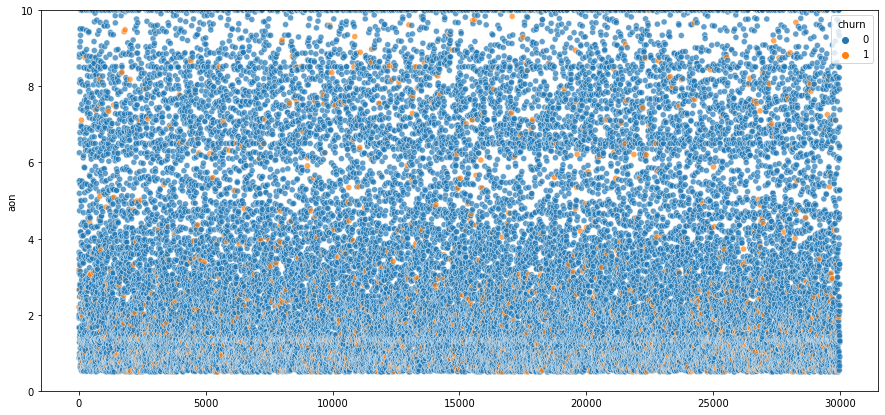

In [68]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=telecom_df['aon'] / 365, x=telecom_df.index, hue=telecom_df.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

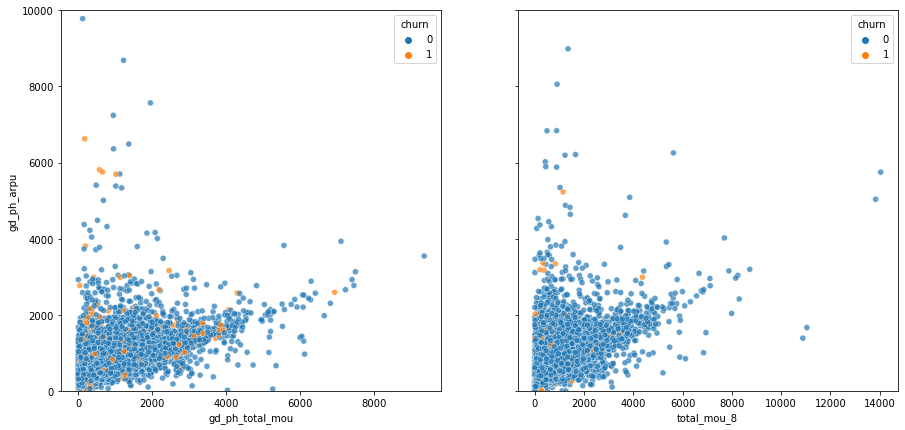

In [69]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=telecom_df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=telecom_df, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

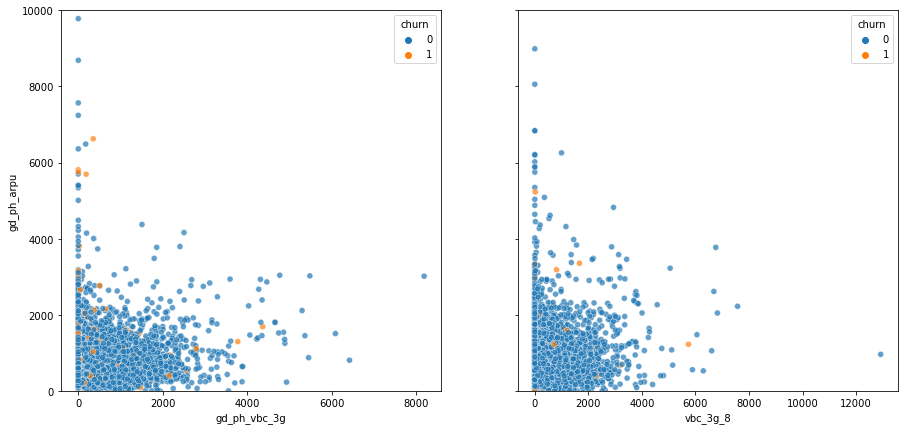

In [70]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=telecom_df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=telecom_df, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

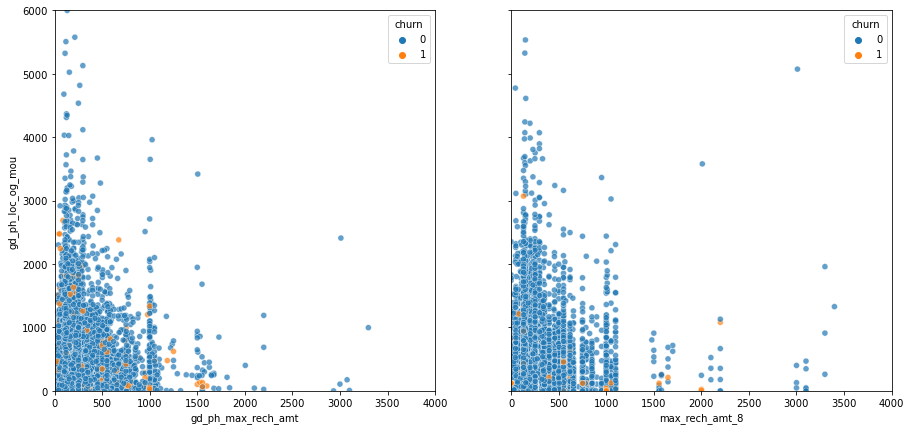

In [71]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=telecom_df, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=telecom_df, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

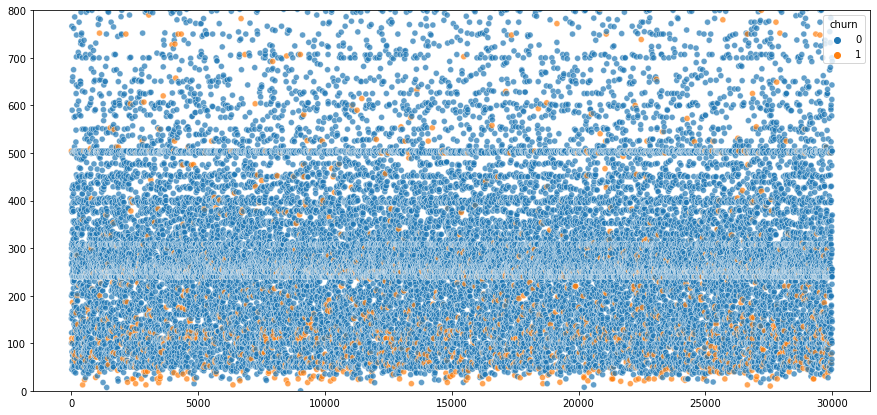

In [72]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=telecom_df.index, y=telecom_df['gd_ph_max_rech_amt'] + telecom_df['max_rech_amt_8'],
                hue=telecom_df['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

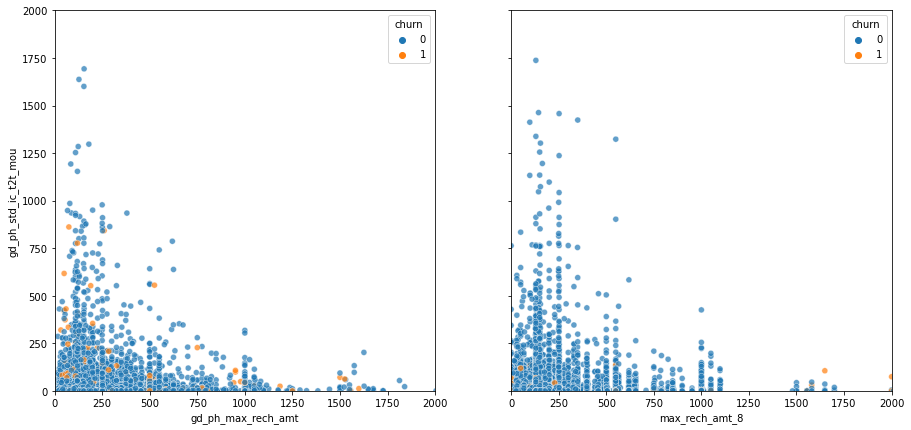

In [73]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=telecom_df, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=telecom_df, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

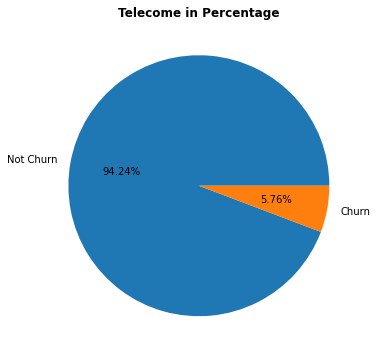

In [74]:
# Plotting pie-chart to check conversion rate

plt.figure(figsize=(6,6))
plt.title("Telecome in Percentage",weight="bold")
telecom_df['churn'].value_counts(normalize=True).plot.pie(autopct = "%1.2f%%",
            labels=["Not Churn","Churn"])
plt.ylabel("")
plt.show()

In [75]:
# Cap the features with high outliers

uppr_col = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in uppr_col:
    telecom_df[col] = telecom_df[col].apply(lambda x : x if x < value else value)


In [76]:
print(telecom_df.churn.value_counts())
telecom_df.churn.value_counts(normalize=True).reset_index()

0    28272
1     1729
Name: churn, dtype: int64


index     churn
0      0  0.942369
1      1  0.057631

Text(0.5, 1.0, 'Churn Distributions \n (0: No Churn || 1: Churn)')

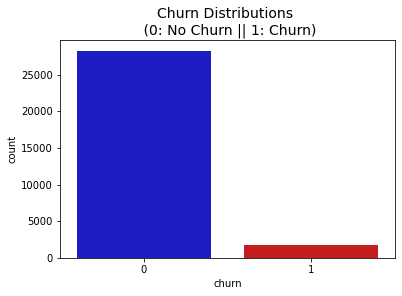

In [77]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('churn', data=telecom_df, palette=colors)
plt.title('Churn Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

We can see that churn that have been filed is only 5.7%. Therefore this is highly imbalanced. Why is it important to handle imbalanced classes.
Challenges related to imbalanced dataset

1.Biased predictions
2.Misleading accuracy

In [78]:
X = telecom_df.drop('churn', axis=1)
y = telecom_df['churn']

### Rescaling

In [79]:

# Instantiating an object

scaler=StandardScaler()

# Fitting and transforming the train-set

X[X.columns]=scaler.fit_transform(X[X.columns])

### Handling Class Imbalance

In [80]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
X = telecom_df.drop('churn', axis=1)
y = telecom_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [81]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19790
1     1210
Name: churn, dtype: int64


index     churn
0      0  0.942381
1      1  0.057619

In [82]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8482
1     519
Name: churn, dtype: int64


index    churn
0      0  0.94234
1      1  0.05766

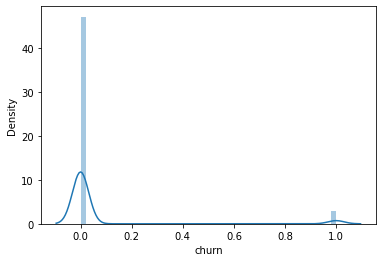

In [83]:
sns.distplot(y_train)
plt.show()

In [84]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = lreg.predict(X_test)

In [86]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9561159871125431
F1 score:  0.5153374233128835
Recall:  0.4046242774566474
Precision:  0.7094594594594594

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      8482
           1       0.71      0.40      0.52       519

    accuracy                           0.96      9001
   macro avg       0.84      0.70      0.75      9001
weighted avg       0.95      0.96      0.95      9001


 confussion matrix:
 [[8396   86]
 [ 309  210]]


In [87]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X, y)
len(X_resampled_smt)

56544

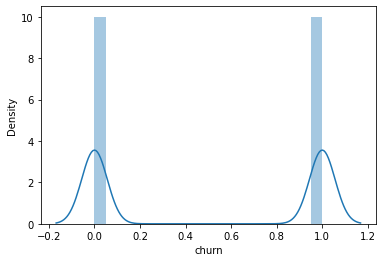

In [89]:
sns.distplot(y_resampled_smt)
plt.show()

In [90]:
y_resampled_smt.value_counts()

1    28272
0    28272
Name: churn, dtype: int64

In [91]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 28272), (1, 28272)]


In [92]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [93]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8690145539384513
F1 score:  0.4166254329539832
Recall:  0.8111753371868978
Precision:  0.2802929427430093

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      8482
           1       0.28      0.81      0.42       519

    accuracy                           0.87      9001
   macro avg       0.63      0.84      0.67      9001
weighted avg       0.95      0.87      0.90      9001


 confussion matrix:
 [[7401 1081]
 [  98  421]]


In [94]:
X.shape

(30001, 55)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# PCA

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [95]:

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_resampled_smt)
X_pca.shape

(56544, 25)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# Model Building

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### Logistic Regression

For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [96]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_resampled_smt, y_resampled_smt, train_size=0.7, random_state=42)

In [97]:
X_train.shape,y_train.shape

((39580, 55), (39580,))

In [98]:
X_test.shape,y_test.shape

((16964, 55), (16964,))

In [99]:
# Initial logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39524
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13315.
Date:                Tue, 14 Feb 2023   Deviance:                       26630.
Time:                        23:39:37   Pearson chi2:                 6.61e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5101
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Selecting features using RFE

In [100]:
logm = LogisticRegression()
logm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=logm, n_features_to_select=25)

rfe = rfe.fit(X_train, y_train)

In [101]:
# Investigating feature ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', False, 15),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 6),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', False, 31),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 7),
 ('std_ic_t2f_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('spl_ic_mou_8', False, 23),
 ('isd_ic_mou_8', False, 4),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 12),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_8', True, 1),
 ('aon', False, 22),
 ('total_mou_8', True, 1),
 ('gd_ph_og_others', False, 29),
 ('gd_ph_isd_og_mou', True, 1),
 ('gd_ph_std_og_mou', False, 14),
 ('gd_ph_total_mou', False, 13),
 ('gd_ph_loc_og_t2c_mou', False, 19),
 ('gd_ph_ic_others', True, 1),
 ('gd_ph_last_day_rch

In [102]:
# Checking top ranked features

col = X_train.columns[rfe.support_]
col

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'total_mou_8', 'gd_ph_isd_og_mou',
       'gd_ph_ic_others', 'gd_ph_total_rech_num', 'gd_ph_loc_ic_mou',
       'gd_ph_monthly_2g', 'gd_ph_std_og_t2f_mou'],
      dtype='object')

In [103]:
# Checking insignificant features

X_train.columns[~rfe.support_]

Index(['arpu_8', 'loc_og_t2c_mou_8', 'og_others_8', 'std_ic_t2t_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'max_rech_amt_8', 'aon',
       'gd_ph_og_others', 'gd_ph_std_og_mou', 'gd_ph_total_mou',
       'gd_ph_loc_og_t2c_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_arpu',
       'gd_ph_sachet_3g', 'gd_ph_spl_og_mou', 'gd_ph_roam_ic_mou',
       'gd_ph_vol_2g_mb', 'gd_ph_isd_ic_mou', 'gd_ph_monthly_3g',
       'gd_ph_spl_ic_mou', 'gd_ph_std_ic_t2f_mou', 'gd_ph_roam_og_mou',
       'gd_ph_loc_og_mou', 'gd_ph_std_ic_mou', 'gd_ph_sachet_2g',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_max_rech_amt', 'gd_ph_vbc_3g',
       'vbc_3g_8'],
      dtype='object')

In [104]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Model : 1

In [105]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
18           total_mou_8  46.39
4           std_og_mou_8  24.86
2           loc_og_mou_8  12.12
11      total_rech_num_8   4.23
7           loc_ic_mou_8   3.79
22      gd_ph_loc_ic_mou   3.42
21  gd_ph_total_rech_num   3.02
1          roam_og_mou_8   2.17
3       std_og_t2f_mou_8   2.04
24  gd_ph_std_og_t2f_mou   2.01
5           isd_og_mou_8   1.87
19      gd_ph_isd_og_mou   1.83
14          monthly_2g_8   1.69
23      gd_ph_monthly_2g   1.65
15           sachet_2g_8   1.54
12    last_day_rch_amt_8   1.53
0          roam_ic_mou_8   1.45
13           vol_2g_mb_8   1.37
10           ic_others_8   1.36
20       gd_ph_ic_others   1.36
6           spl_og_mou_8   1.21
9           std_ic_mou_8   1.20
16          monthly_3g_8   1.17
8       std_ic_t2f_mou_8   1.17
17           sachet_3g_8   1.14

In [106]:
# Build new model
X_train_sm1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39554
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14081.
Date:                Tue, 14 Feb 2023   Deviance:                       28163.
Time:                        23:39:54   Pearson chi2:                 1.74e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4907
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4817 

Since the P-value for gd_ph_monthly_2g is very high we will drop it

In [107]:
#dropping column with high p-value
col = col.drop("gd_ph_monthly_2g", 1)

### Model : 2

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
18           total_mou_8  46.38
4           std_og_mou_8  24.84
2           loc_og_mou_8  12.12
11      total_rech_num_8   4.23
7           loc_ic_mou_8   3.79
22      gd_ph_loc_ic_mou   3.42
21  gd_ph_total_rech_num   3.01
1          roam_og_mou_8   2.17
3       std_og_t2f_mou_8   2.04
23  gd_ph_std_og_t2f_mou   2.01
5           isd_og_mou_8   1.87
19      gd_ph_isd_og_mou   1.83
15           sachet_2g_8   1.54
12    last_day_rch_amt_8   1.53
0          roam_ic_mou_8   1.45
10           ic_others_8   1.36
20       gd_ph_ic_others   1.36
13           vol_2g_mb_8   1.35
14          monthly_2g_8   1.26
6           spl_og_mou_8   1.21
9           std_ic_mou_8   1.20
16          monthly_3g_8   1.17
8       std_ic_t2f_mou_8   1.17
17           sachet_3g_8   1.14

In [109]:
# Build new model
X_train_sm2 = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39555
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14081.
Date:                Tue, 14 Feb 2023   Deviance:                       28163.
Time:                        23:39:56   Pearson chi2:                 1.74e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4907
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4815 

In [110]:
#dropping column with high p-value
col = col.drop("std_ic_t2f_mou_8", 1)

Since the P-value for std_ic_t2f_mou_8 is very high we will drop it

### Model : 3

In [111]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
17           total_mou_8  46.36
4           std_og_mou_8  24.84
2           loc_og_mou_8  12.12
10      total_rech_num_8   4.23
7           loc_ic_mou_8   3.79
21      gd_ph_loc_ic_mou   3.42
20  gd_ph_total_rech_num   3.01
1          roam_og_mou_8   2.17
22  gd_ph_std_og_t2f_mou   2.00
3       std_og_t2f_mou_8   1.99
5           isd_og_mou_8   1.87
18      gd_ph_isd_og_mou   1.83
14           sachet_2g_8   1.54
11    last_day_rch_amt_8   1.53
0          roam_ic_mou_8   1.45
9            ic_others_8   1.36
19       gd_ph_ic_others   1.36
12           vol_2g_mb_8   1.35
13          monthly_2g_8   1.26
6           spl_og_mou_8   1.21
15          monthly_3g_8   1.17
8           std_ic_mou_8   1.16
16           sachet_3g_8   1.14

In [112]:
# Build new model
X_train_sm3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39556
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14081.
Date:                Tue, 14 Feb 2023   Deviance:                       28163.
Time:                        23:39:58   Pearson chi2:                 1.74e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4907
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4814 

In [113]:
#dropping column with high vif-value
col = col.drop("gd_ph_std_og_t2f_mou",  1)

Since the P-value for gd_ph_std_og_t2f_mou is very high we will drop it

### Model : 4

In [114]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
17           total_mou_8  46.31
4           std_og_mou_8  24.81
2           loc_og_mou_8  12.11
10      total_rech_num_8   4.23
7           loc_ic_mou_8   3.79
21      gd_ph_loc_ic_mou   3.41
20  gd_ph_total_rech_num   3.01
1          roam_og_mou_8   2.17
5           isd_og_mou_8   1.87
18      gd_ph_isd_og_mou   1.83
14           sachet_2g_8   1.54
11    last_day_rch_amt_8   1.53
0          roam_ic_mou_8   1.45
9            ic_others_8   1.36
19       gd_ph_ic_others   1.36
12           vol_2g_mb_8   1.35
13          monthly_2g_8   1.26
6           spl_og_mou_8   1.21
15          monthly_3g_8   1.17
8           std_ic_mou_8   1.15
16           sachet_3g_8   1.14
3       std_og_t2f_mou_8   1.05

In [115]:
# Build new model
X_train_sm4 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39557
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14081.
Date:                Tue, 14 Feb 2023   Deviance:                       28163.
Time:                        23:40:00   Pearson chi2:                 1.74e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4907
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4817 

In [116]:
#dropping column with high p-value
col = col.drop("vol_2g_mb_8",1)

Since the P-value for vol_2g_mb_8 is very high we will drop it

### Model : 5

In [117]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16           total_mou_8  46.30
4           std_og_mou_8  24.81
2           loc_og_mou_8  12.11
10      total_rech_num_8   4.23
7           loc_ic_mou_8   3.79
20      gd_ph_loc_ic_mou   3.41
19  gd_ph_total_rech_num   3.01
1          roam_og_mou_8   2.17
5           isd_og_mou_8   1.87
17      gd_ph_isd_og_mou   1.83
11    last_day_rch_amt_8   1.53
0          roam_ic_mou_8   1.45
13           sachet_2g_8   1.42
9            ic_others_8   1.36
18       gd_ph_ic_others   1.36
6           spl_og_mou_8   1.21
14          monthly_3g_8   1.16
8           std_ic_mou_8   1.15
15           sachet_3g_8   1.14
12          monthly_2g_8   1.10
3       std_og_t2f_mou_8   1.05

In [118]:
# Build new model
X_train_sm5 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39558
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14081.
Date:                Tue, 14 Feb 2023   Deviance:                       28163.
Time:                        23:40:01   Pearson chi2:                 1.76e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4907
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4803 

In [119]:
#dropping column with high p-value
col = col.drop("total_mou_8",1)

Since the vif-value for total_mou_8 is very high we will drop it

### Model: 6

In [120]:
# calculate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10      total_rech_num_8  4.21
7           loc_ic_mou_8  3.77
19      gd_ph_loc_ic_mou  3.41
18  gd_ph_total_rech_num  2.81
2           loc_og_mou_8  2.03
5           isd_og_mou_8  1.86
16      gd_ph_isd_og_mou  1.82
4           std_og_mou_8  1.73
11    last_day_rch_amt_8  1.53
1          roam_og_mou_8  1.48
0          roam_ic_mou_8  1.45
13           sachet_2g_8  1.41
9            ic_others_8  1.36
17       gd_ph_ic_others  1.36
6           spl_og_mou_8  1.19
14          monthly_3g_8  1.16
8           std_ic_mou_8  1.15
15           sachet_3g_8  1.14
12          monthly_2g_8  1.10
3       std_og_t2f_mou_8  1.05

In [121]:
# Build new model
X_train_sm6 = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
res6 = logm6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39559
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16734.
Date:                Tue, 14 Feb 2023   Deviance:                       33469.
Time:                        23:40:03   Pearson chi2:                 1.19e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4177
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4974 

In [122]:
#dropping column with high p-value
col = col.drop("ic_others_8",1)

Since the vif-value for ic_others_8 is very high we will drop it

### Model: 7

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9       total_rech_num_8  4.21
7           loc_ic_mou_8  3.77
18      gd_ph_loc_ic_mou  3.41
17  gd_ph_total_rech_num  2.81
2           loc_og_mou_8  2.03
5           isd_og_mou_8  1.86
15      gd_ph_isd_og_mou  1.82
4           std_og_mou_8  1.73
10    last_day_rch_amt_8  1.53
1          roam_og_mou_8  1.48
0          roam_ic_mou_8  1.45
12           sachet_2g_8  1.41
6           spl_og_mou_8  1.19
13          monthly_3g_8  1.16
8           std_ic_mou_8  1.15
14           sachet_3g_8  1.14
11          monthly_2g_8  1.10
3       std_og_t2f_mou_8  1.05
16       gd_ph_ic_others  1.02

In [124]:
# Build new model
X_train_sm7 = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
res7 = logm7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39560
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16734.
Date:                Tue, 14 Feb 2023   Deviance:                       33469.
Time:                        23:40:04   Pearson chi2:                 1.18e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4177
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4973 

In [125]:
#dropping column with high p-value
col = col.drop("isd_og_mou_8",1)

Since the vif-value for isd_og_mou_8 is very high we will drop it

### Model: 8

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8       total_rech_num_8  4.16
6           loc_ic_mou_8  3.77
17      gd_ph_loc_ic_mou  3.41
16  gd_ph_total_rech_num  2.80
2           loc_og_mou_8  2.02
4           std_og_mou_8  1.72
9     last_day_rch_amt_8  1.51
1          roam_og_mou_8  1.48
0          roam_ic_mou_8  1.45
11           sachet_2g_8  1.41
5           spl_og_mou_8  1.19
12          monthly_3g_8  1.16
7           std_ic_mou_8  1.15
13           sachet_3g_8  1.14
10          monthly_2g_8  1.10
3       std_og_t2f_mou_8  1.05
14      gd_ph_isd_og_mou  1.03
15       gd_ph_ic_others  1.02

In [127]:
# Build new model
X_train_sm8 = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
res8 = logm8.fit()
print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39561
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16735.
Date:                Tue, 14 Feb 2023   Deviance:                       33470.
Time:                        23:40:06   Pearson chi2:                 1.23e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4176
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4990 

In [128]:
#dropping column with high p-value
col = col.drop("spl_og_mou_8",1)

Since the vif-value for spl_og_mou_8 is very high we will drop it

### Model: 9

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7       total_rech_num_8  4.09
5           loc_ic_mou_8  3.76
16      gd_ph_loc_ic_mou  3.41
15  gd_ph_total_rech_num  2.80
2           loc_og_mou_8  2.02
4           std_og_mou_8  1.70
8     last_day_rch_amt_8  1.51
1          roam_og_mou_8  1.48
0          roam_ic_mou_8  1.45
10           sachet_2g_8  1.41
11          monthly_3g_8  1.16
6           std_ic_mou_8  1.15
12           sachet_3g_8  1.13
9           monthly_2g_8  1.10
3       std_og_t2f_mou_8  1.05
13      gd_ph_isd_og_mou  1.03
14       gd_ph_ic_others  1.02

In [130]:
# Build new model
X_train_sm9 = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
res9 = logm9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                39580
Model:                            GLM   Df Residuals:                    39562
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16737.
Date:                Tue, 14 Feb 2023   Deviance:                       33473.
Time:                        23:40:07   Pearson chi2:                 1.29e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4176
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4982 

In [131]:
# Checking the parameters and their coefficient values of final model (glm5)

res9.params[:10]

const                 1.498163
roam_ic_mou_8        -0.004860
roam_og_mou_8         0.000534
loc_og_mou_8         -0.001069
std_og_t2f_mou_8     -0.020155
std_og_mou_8         -0.000621
loc_ic_mou_8         -0.002379
std_ic_mou_8         -0.002620
total_rech_num_8     -0.147168
last_day_rch_amt_8   -0.004393
dtype: float64

### Model Evaluation

In [132]:
# Getting the predicted values on the train set
y_train_pred = res9.predict(X_train_sm9)
y_train_pred[:10]

14889    0.678921
20552    0.002178
27776    0.019119
49944    0.708901
52837    0.820937
53762    0.192581
42695    0.883271
28782    0.025789
44911    0.777768
26895    0.837232
dtype: float64

In [133]:
# Predict on train data

y_train_pred = res9.predict(X_train_sm9).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Predicted
0      0    0.678921          1
1      0    0.002178          0
2      0    0.019119          0
3      1    0.708901          1
4      1    0.820937          1

In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)
Accuracy = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print("")
print(f"Accuracy_score: {Accuracy}")

[[15684  4094]
 [ 2787 17015]]

Accuracy_score: 0.8261495704901466


In [135]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8592566407433593

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.7930023258165638

In [138]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.20699767418343615


In [139]:
# positive predictive value 
print (TP / float(TP+FP))

0.8060542896394902


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8491148286503167


### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
# Defining function for confusion_matrix

def conf_matrix(cf_matrix):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(5,4))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr',annot_kws={'size': 14})
    plt.title('Confusion Matrix', size=14,  weight='bold')
    plt.tight_layout()
    
    return plt.show()

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.yticks(fontsize = 10, weight = "bold") 
    plt.xticks(fontsize = 10, weight = "bold")
    plt.grid(linestyle='--', linewidth=.5)
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

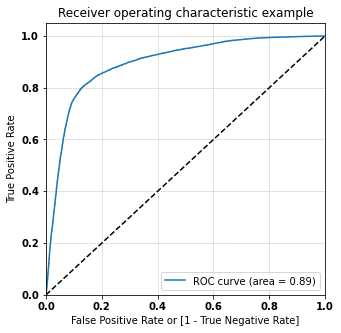

In [144]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

ROC-We are getting a good value of ROC 0.89 indicating a good predictive model. Higher the Roc better model

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.678921          1    1    1    1    1    1    1    1    0    0   
1      0    0.002178          0    1    0    0    0    0    0    0    0    0   
2      0    0.019119          0    1    0    0    0    0    0    0    0    0   
3      1    0.708901          1    1    1    1    1    1    1    1    1    0   
4      1    0.820937          1    1    1    1    1    1    1    1    1    1   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Senstivity','Specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

Probability  Accuracy  Senstivity  Specificity
0.0          0.0  0.500303    1.000000     0.000000
0.1          0.1  0.684992    0.970508     0.399130
0.2          0.2  0.736230    0.945915     0.526292
0.3          0.3  0.775341    0.921271     0.629235
0.4          0.4  0.804270    0.893041     0.715391
0.5          0.5  0.826150    0.859257     0.793002
0.6          0.6  0.834866    0.814716     0.855041
0.7          0.7  0.826099    0.747399     0.904894
0.8          0.8  0.744846    0.543379     0.946557
0.9          0.9  0.570844    0.154075     0.988118

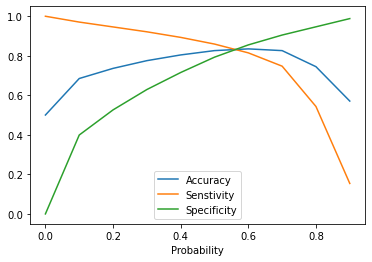

In [147]:
# Plotting Accuracy, Sensitivity and Specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Senstivity','Specificity'])

plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.678921          1    1    1    1    1    1    1    1    0    0   
1      0    0.002178          0    1    0    0    0    0    0    0    0    0   
2      0    0.019119          0    1    0    0    0    0    0    0    0    0   
3      1    0.708901          1    1    1    1    1    1    1    1    1    0   
4      1    0.820937          1    1    1    1    1    1    1    1    1    1   

   0.9  final_predicted  
0    0                0  
1    0                0  
2    0                0  
3    0                1  
4    0                1

In [149]:
# Assigning Lead Score

y_train_pred_final['Churn Score'] = y_train_pred_final.Churn_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Churn  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.678921          1    1    1    1    1    1    1    1    0    0   
1      0    0.002178          0    1    0    0    0    0    0    0    0    0   
2      0    0.019119          0    1    0    0    0    0    0    0    0    0   
3      1    0.708901          1    1    1    1    1    1    1    1    1    0   
4      1    0.820937          1    1    1    1    1    1    1    1    1    1   

   0.9  final_predicted  Churn Score  
0    0                0           68  
1    0                0            0  
2    0                0            2  
3    0                1           71  
4    0                1           82

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

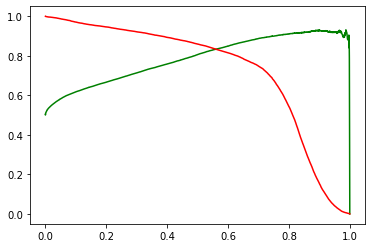

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.show()

### Making Predictions on the Test set

In [152]:
X_test = X_test[col]
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [153]:
X_test.shape

(16964, 17)

In [154]:
X_test_sm.shape

(16964, 18)

In [155]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res9.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
27613      1    0.478300          0
26371      0    0.209943          0
50259      1    0.335417          0
54713      1    0.983723          1
49412      1    0.739435          1

In [156]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res9.predict(sm.add_constant(X_test))

In [157]:
y_test_pred[:10]

27613    0.478300
26371    0.209943
50259    0.335417
54713    0.983723
49412    0.739435
31451    0.678086
9189     0.300579
6425     0.097086
42401    0.783706
9367     0.018878
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
# Let's see the head
y_pred_1.head()

0
27613  0.478300
26371  0.209943
50259  0.335417
54713  0.983723
49412  0.739435

In [160]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

churn         0
0      1  0.478300
1      0  0.209943
2      1  0.335417
3      1  0.983723
4      1  0.739435

In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})
y_pred_final.head()

churn  churn_Prob
0      1    0.478300
1      0    0.209943
2      1    0.335417
3      1    0.983723
4      1    0.739435

In [165]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [166]:
# Check y_pred_final

y_pred_final.head()

churn  churn_Prob  final_predicted
0      1    0.478300                0
1      0    0.209943                0
2      1    0.335417                0
3      1    0.983723                1
4      1    0.739435                1

In [167]:
# Let's check the overall accuracy
print("Test data accuracy:")
print(metrics.accuracy_score(y_pred_final['churn'], y_pred_final.final_predicted))

Test data accuracy:
0.8263381278000471


In [168]:
print("confusion matrix:")
confusion2 = metrics.confusion_matrix(y_pred_final['churn'], y_pred_final.final_predicted )
print(confusion2)

confusion matrix:
[[6750 1744]
 [1202 7268]]


In [169]:
#matrics build
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Calculate sensitivity
print("Test data sensitivity:")
print(TP / float(TP+FN))

Test data sensitivity:
0.8580873671782763


In [171]:
# Calculate specificity
print("Test data specificity:")
print(TN / float(TN+FP))

Test data specificity:
0.7946785966564633


In [172]:
# Calculate Precision
print("Test data Precision:")
print(TP/float(TP+FP))

Test data Precision:
0.8064802485574789


In [173]:
# Top 10 predictors

abs(res9.params).sort_values(ascending=False)[0:11]

monthly_2g_8            3.361152
const                   1.498163
monthly_3g_8            1.083135
sachet_2g_8             0.403410
sachet_3g_8             0.340735
total_rech_num_8        0.147168
gd_ph_total_rech_num    0.074385
std_og_t2f_mou_8        0.020155
gd_ph_isd_og_mou        0.006879
gd_ph_ic_others         0.005911
roam_ic_mou_8           0.004860
dtype: float64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:


In the Logistic regression we are geting an accuracy of 81% on train data and 81.53% on test data
We can clearly see most of the critical features are form the action phase, which is inline with the bussiness understanding that action phase needs more attention   
    

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# Decision Tree

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [174]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled_smt, train_size=0.7, random_state=42)

In [175]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [176]:

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8494
           1       0.87      0.92      0.90      8470

    accuracy                           0.89     16964
   macro avg       0.89      0.89      0.89     16964
weighted avg       0.89      0.89      0.89     16964



In [177]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7373 1121]
 [ 689 7781]]
0.8933034661636406


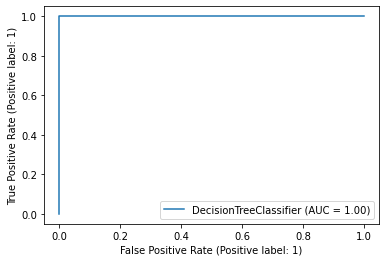

In [178]:
# Plot ROC curve

plot_roc_curve(dt_default, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [179]:
# GridSearchCV to find optimal max_depth



# specify number of folds for k-fold CV


# parameters to build the model on
params = {'max_depth': [2, 3, 5, 10, 20],
        'min_samples_split':[20, 50, 100,250, 500],
        'min_samples_leaf': [ 5, 10, 25, 50, 100],
         'criterion': ["gini", "entropy"]
        }

# instantiate the model
grid_search = GridSearchCV(estimator=dt_default, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy",return_train_score=True)



In [180]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
CPU times: total: 13.4 s
Wall time: 6min 29s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 25, 50, 100],
                         'min_samples_split': [20, 50, 100, 250, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [181]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.749032      0.093405         0.005926        0.000670   
1       0.797435      0.083495         0.006015        0.000785   
2       0.809163      0.130778         0.005097        0.001021   
3       0.764791      0.157847         0.009842        0.006801   
4       0.948273      0.120620         0.007032        0.001551   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                      5   
2            gini               2                      5   
3            gini               2                      5   
4            gini               2                      5   

  param_min_samples_split                                             params  \
0                      20  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
1                      50  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
2                     100  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
3                     250  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
4                     500  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.708691           0.713113            0.70806            0.70427   
1           0.708691           0.713113            0.70806            0.70427   
2           0.708691           0.713113            0.70806            0.70427   
3           0.708691           0.713113            0.70806            0.70427   
4           0.708691           0.713113            0.70806            0.70427   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.702501         0.707327        0.003702              201   
1           0.702501         0.707327        0.003702              201   
2           0.702501         0.707327        0.003702              201   
3           0.702501         0.707327        0.003702              201   
4           0.702501         0.707327        0.003702              201   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.708912            0.707239            0.709323   
1            0.708912            0.707239            0.709323   
2            0.708912            0.707239            0.709323   
3            0.708912            0.707239            0.709323   
4            0.708912            0.707239            0.709323   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.709418            0.712702          0.709519         0.001775  
1            0.709418            0.712702          0.709519         0.001775  
2            0.709418            0.712702          0.709519         0.001775  
3            0.709418            0.712702          0.709519         0.001775  
4            0.709418            0.712702          0.709519         0.001775

In [182]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
225       7.216458      1.158664         0.013103        0.013330   
100       3.860378      0.471961         0.012098        0.007970   
230       6.603368      0.998673         0.014410        0.009322   
105       3.330018      0.103962         0.009743        0.004275   
226       6.613940      0.971034         0.008139        0.004025   

    param_criterion param_max_depth param_min_samples_leaf  \
225         entropy              20                      5   
100            gini              20                      5   
230         entropy              20                     10   
105            gini              20                     10   
226         entropy              20                      5   

    param_min_samples_split  \
225                      20   
100                      20   
230                      20   
105                      20   
226                      50   

                                                params  split0_test_score  \
225  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.876074   
100  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.877842   
230  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.871526   
105  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.871400   
226  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.859651   

     split1_test_score  split2_test_score  split3_test_score  \
225           0.867357           0.874305           0.875568   
100           0.858767           0.862052           0.868621   
230           0.859020           0.867484           0.868873   
105           0.857883           0.859020           0.868999   
226           0.851314           0.864199           0.852956   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  \
225           0.869505         0.872562        0.003488                1   
100           0.874432         0.868343        0.007193                2   
230           0.863062         0.865993        0.004435                3   
105           0.868747         0.865210        0.005607                4   
226           0.854851         0.856594        0.004719                5   

     split0_train_score  split1_train_score  split2_train_score  \
225            0.947290            0.948775            0.949248   
100            0.939332            0.940911            0.939869   
230            0.936742            0.935289            0.937216   
105            0.925783            0.928941            0.929384   
226            0.913814            0.915614            0.914982   

     split3_train_score  split4_train_score  mean_train_score  std_train_score  
225            0.950227            0.947922          0.948693         0.001023  
100            0.940721            0.940311          0.940229         0.000574  
230            0.937974            0.938226          0.937089         0.001044  
105            0.929226            0.927773          0.928221         0.001343  
226            0.914698            0.913056          0.914433         0.000900

In [183]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=20, random_state=42)

In [184]:
dt_best = grid_search.best_estimator_

In [185]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [186]:
grid_search.best_score_

0.8725618999494694

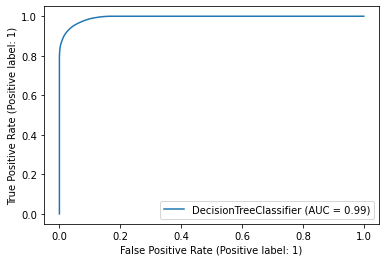

In [187]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

We are getting an accuracy of 99% of AUC in decision Tree

In [188]:
#check classification_report
print(classification_report(y_test, dt_best.predict(X_test)))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8494
           1       0.88      0.90      0.89      8470

    accuracy                           0.88     16964
   macro avg       0.89      0.89      0.88     16964
weighted avg       0.89      0.88      0.88     16964



In [189]:
# check Train Accuracy
print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")

print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
# check Test Accuracy
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy : 0.9526023244062658
Train Confusion Matrix:
[[18920   858]
 [ 1018 18784]]
--------------------------------------------------
Test Accuracy : 0.884991747229427
Test Confusion Matrix:
[[7431 1063]
 [ 888 7582]]


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

After Hypertuning model we getting .
-Accuracy on train set: 95%
-Accuracy on test set: 89%   
-so we can say model performing great

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# Random Forest

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [190]:

#X_train, X_test, y_train, y_test = train_test_split(X_resampled_smt, y_resampled_smt, train_size=0.7, random_state=42)

In [191]:
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)

In [192]:

# Train Accuracy

print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))
print(f'Test accuracy : {metrics.accuracy_score(y_test, y_test_pred)}')


Train accuracy : 0.9132137443153108
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8494
           1       0.88      0.90      0.89      8470

    accuracy                           0.89     16964
   macro avg       0.89      0.89      0.89     16964
weighted avg       0.89      0.89      0.89     16964

Test accuracy : 0.8895897194058006


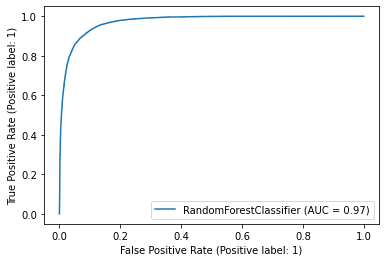

In [193]:
# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [194]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features=5, random_state=1608637542)

In [195]:
rf.oob_score_

0.8729914098029308

#### Hyper-parameter tuning for the Random Forest

In [196]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [197]:
#define Parametars
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [ ]:
%%time
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:
grid_search_rf.best_score_

In [ ]:
rf_best = grid_search_rf.best_estimator_
rf_best

In [ ]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [ ]:
# ROC
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [ ]:
print(classification_report(y_test, rf_best.predict(X_test)))

In [ ]:
print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")

print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False).head(15)

In [ ]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

After Hypertuning model we getting .
-Accuracy on train set: 98%
-Accuracy on test set: 96%   
-so we can say model performing great

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# Adaboost

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [ ]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 42)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
y_train_pred = shallow_tree.predict(X_train)
metrics.accuracy_score(y_train, y_train_pred)

In [ ]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 200, 20))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=42)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

In [ ]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [ ]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 160, random_state=42)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(score)

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

In [ ]:
print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")

print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

After Hypertuning model we getting .
-Accuracy on train set: 96%
-Accuracy on train set: 96%   
-so we can say model performing great

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# PCA

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [ ]:
X.shape

In [ ]:
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_resampled_smt)
X_pca.shape

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 10 components

In [ ]:
pca_final = IncrementalPCA(n_components=10)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
pred_probs_test

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

we got 86% PCA is great!

In [ ]:
df = pd.DataFrame(df_train_pca, columns=["PC1", "PC2","PC3", "PC4","PC5", "PC6","PC7", "PC8","PC9", "PC10"])
df.head()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Conclusion:

The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said - 

***"In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition."***

Thus to predict or analyse the behavior of a customer over a time period of good phase and the action phase we created about 4 predictive models as mentioned below -  

1. Logistic Regression Model.
2. PCA.
3. Decision Tree Classifier.
4. Random Forest Classifier.
5. Adaboost    
    

    
We can see the greater part of the top indicators are from the activity stage, as the drop in commitment is conspicuous in that stage    
    
If you check over the all model Random forest and AdaBost comes with performing the best, which is highest accuracy along with highest recall i.e. 95% and 97% respectively. So, we will go with random forest instead of adaboost as that is comparetively simpler model.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Conclusion:

1. Logistic Regression Model.
--In the Logistic regression we are geting an accuracy of 83% on train data and 82% on test data
    
--ROC-We are getting a good value of ROC 0.88 indicating a good predictive model. Higher the Roc better model
--Optimal Cutoff 0.5
    
--confusion matrix:[[10685  3203]
                     [ 2045 11773]]
    </p>
 
--Top 10 Predictor parameters 
    
        monthly_2g_8             
        monthly_3g_8
        sachet_2g_8
        sachet_3g_8       
        total_rech_num_8  
        gd_ph_total_rech_num  
        std_og_t2f_mou_8      
        gd_ph_isd_og_mou       
        gd_ph_ic_others         
        roam_ic_mou_8           
        
        
  
    

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Conclusion:

1. Decision Tree Model.
-Train Accuracy : 95%
Train Confusion Matrix:
[[19640   132]
 [  747   481]]
--------------------------------------------------
Test Accuracy : 88%
Test Confusion Matrix:
[[8449   51]
 [ 294  207]]
    
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=20, random_state=42)
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Conclusion:

1. Random Forest.
Accuracy on Train set this model is 98%
    
Accuracy on test set this model is 96%
    
Best_Estimater:RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,random_state=42)
    
Best score: 95%
    

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Conclusion:

1. Adabosting.
-Accuracy for train set this model is 97%
    
-Accuracy for test set this model is 95%
    
-Best score=95%
    

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Conclusion:

1. PCA.
    
-Best score=83%
    

<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  